Primero importamos las librerias y el dataset

In [ ]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
cardio_1=pd.read_csv('/content/drive/MyDrive/cardiovascular_mapa.csv')

In [ ]:
X=cardio_1[['age', 'ap_hi','ap_lo','smoke', 'cholesterol']]
Y=cardio_1['cardio']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
log_reg.score(X_test, Y_test)

0.7221440300258034

In [ ]:
Y_test - Y_pred

27320    0
57460   -1
54916    0
34252    0
13524    1
        ..
56863    0
34589    0
58789    0
38420    0
35148    0
Name: cardio, Length: 17052, dtype: int64

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

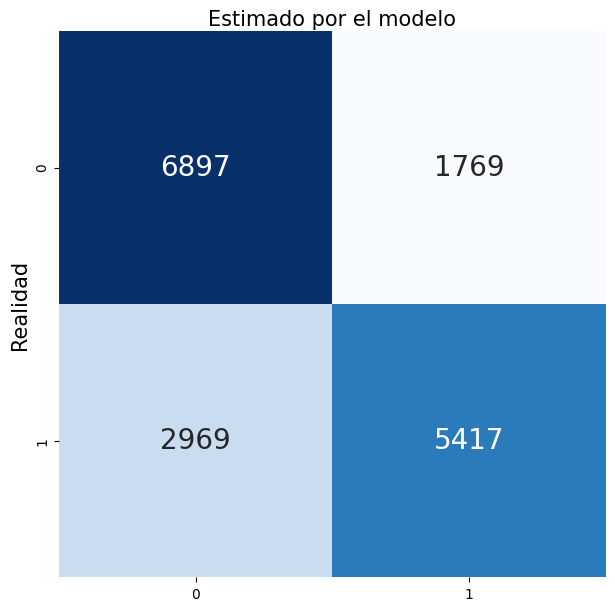

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
precision = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1])
sensibilidad = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])
especificidad = cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])
precision
sensibilidad
especificidad

In [ ]:
f1_score = 2 * (precision * sensibilidad) / (precision + sensibilidad)
print("f1 =",f1_score)

f1 = 0.6957359362959157


In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mse
r2

-0.11172363200919144

In [ ]:
print("Precisión ",precision)
print("Exactitud: ",sensibilidad)
print("Sensibilidad: ",especificidad)
print("f1: ",f1_score)
print("mse: ",mse)
print("r2: ",r2)

Precisión  0.7538268856109102
Exactitud:  0.645957548294777
Sensibilidad:  0.7958689129933072
f1:  0.6957359362959157
mse:  0.2778559699741966
r2:  -0.11172363200919144


In [ ]:
# Calcula la precisión del modelo en el conjunto de prueba
pre= np.mean(Y_pred == Y_test)
print(f'Precisión del modelo en el conjunto de prueba: {pre}')

Precisión del modelo en el conjunto de prueba: 0.7221440300258034


In [ ]:
scores = cross_val_score(Y_pred, X, Y, cv=5)
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')


TypeError: ignored